## hawks.csv
El archivo Hawks.csv contiene mediciones de casi 900 aves de tres especies diferentes. Los datos registrados
son:
* Epecies
* año 
* hallux
* ala
* peso 
* cola

### Calcule la correlación lineal entre los atributos Ala y Cola.

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import chardet

In [55]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR  = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR    = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
    # MODELOS_DIR  = '/content/drive/MyDrive/Colab Notebooks/MODELOS/'    # carpeta donde se encuentran los modelos
    # ARCHIVOS_DIR = '/content/drive/MyDrive/Colab Notebooks/ARCHIVOS/'   # carpeta recuperar o copiar archivos
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR  = 'Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR    = 'Datos/'      # carpeta donde se encuentran los datasets
    # MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
    # ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)




Datos/Hawks.csv


,Perimetro,Area,Clase
0,667.997041,3793,Hoja
1,784.246825,2574,Helecho
2,367.747258,3582,Hoja
3,901.595021,5068,Helecho
4,949.175757,12216,Hoja
5,763.269119,980,Helecho
6,197.580736,3370,Hoja
7,799.619408,1669,Helecho
8,452.475180,3585,Hoja
9,1564.482323,2964,Helecho


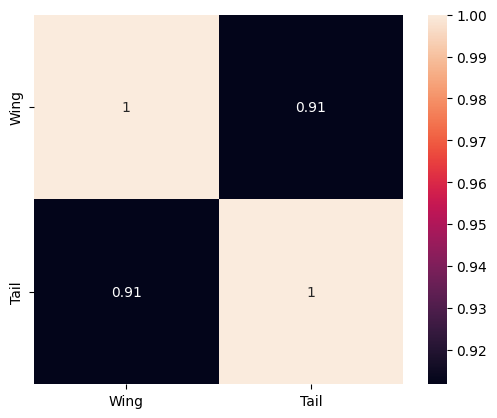

In [56]:
nombre_archivo = DATOS_DIR + 'Hawks.csv'
print(nombre_archivo)


datos = pd.read_csv(nombre_archivo)
sns.heatmap(datos.iloc[:, [2,4]].corr(), square=True, annot=True)
nombre_archivo = DATOS_DIR + 'hojas.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)


datos = pd.read_csv()
datos.iloc[:, [2,4]].corr()

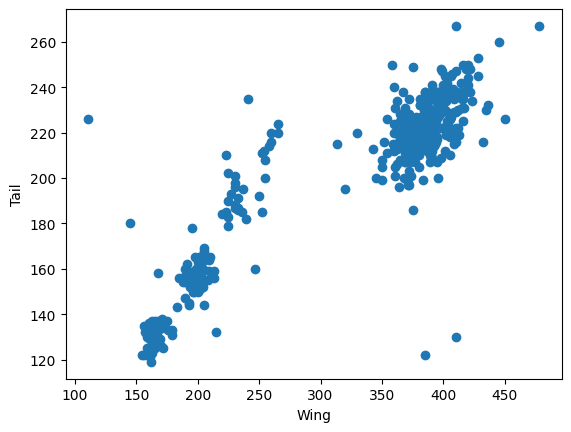

In [57]:
plt.figure()
datosEntrenamiento = 'Wing'
Y = 'Tail'
plt.scatter(datos[datosEntrenamiento],datos[Y])
plt.datosEntrenamientolabel( datosEntrenamiento )
plt.ylabel( Y )
plt.show()

<Figure size 640x480 with 0 Axes>

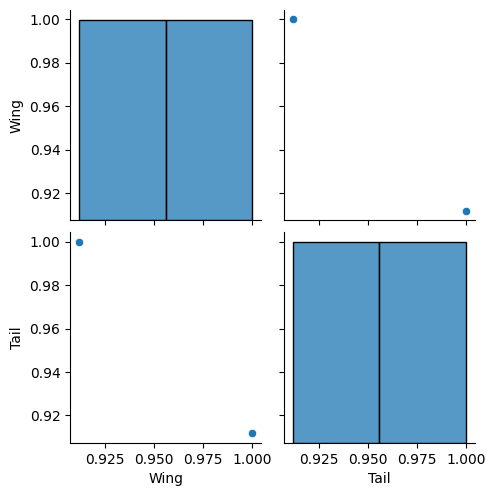

In [58]:
plt.figure()
sns.pairplot(datos.iloc[:, [2,4]].corr())
plt.show()

##### Indique la intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa)
* La relacion es de correlacion fuerte. El tipo es positiva (mientras mas grande sea la cola, mas grande es el tamaño del ala )


#### Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media y desvío.

NO NORMALIZADO:
media: 25.7994 , desvio: 10.6016, minimo: 9.6, maximo: 130
Q1: 15.15, Q2: 29.5, Q3: 31.5
RIC:16.35
rango Inferior: -9.375, rango Superior: 56.025 
bigote Inferior: 9.6, bigote Superior: 44.7 


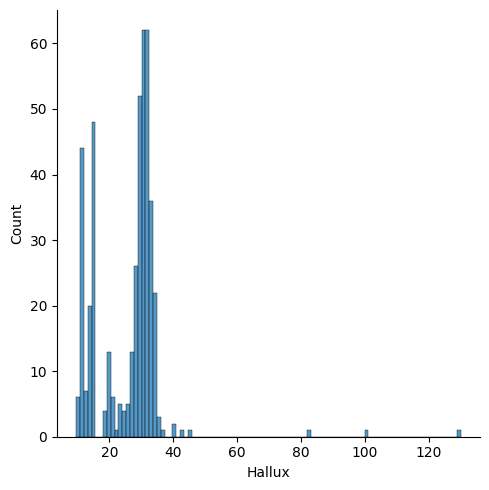

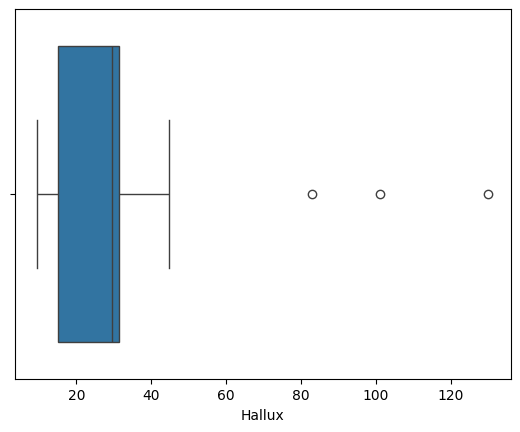

DESPUES DE NORMALIZAR:
media: 2.70229e-16 , desvio: 1, minimo: -1.52802, maximo: 9.82877
Q1: -1.00451, Q2: 0.349057, Q3: 0.537708
RIC:1.54222
rango Inferior: -3.31785, rango Superior: 2.85104 
bigote Inferior: -1.52802, bigote Superior: 1.78281 


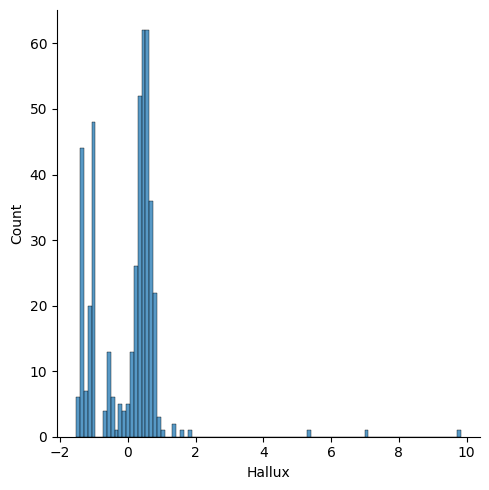

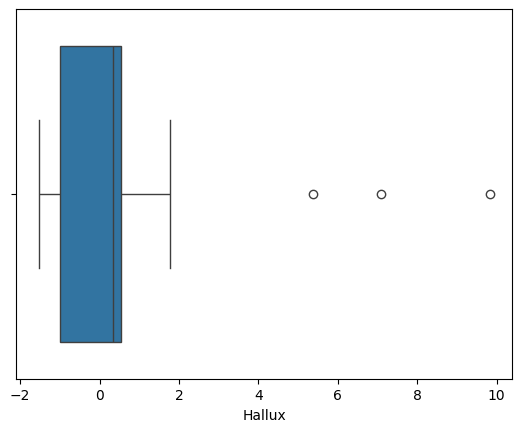

In [59]:
def RIC(df):
    return df.quantile(0.75)- df.quantile(0.25).iloc[0]

def rangoInferior(df):
    return df.quantile(0.25) - (1.5*RIC(df)).iloc[0]

def rangoSuperior(df):
    return df.quantile(0.75) + (1.5*RIC(df)).iloc[0]
    
def bigoteInferior(df):
    dfAudatosEntrenamiento = df.sort_values(by="Hallux",ignore_index=True)       #ordena la tabla por hallux, ignoro los indices viejos
    
    encontro = False                     
    i = int(0)
    rango= rangoInferior(df).iloc[0]                 #toma el valor del rango anterior.

    while(not encontro and (i<dfAux.size) ):        #mientras no encuentre el bigote, y no termine de recorrer el dataframe
        act= np.float64(dfAux.at[i,'Hallux'])       #tomo el valor actual, lo convierto a float64.

        if( act > rango):                           #si el valor actual esta dentro del rango
            encontro = True                         #lo marco como encontrado
            valorEncontrado = dfAux.at[i,'Hallux']  #lo guardo para retornarlo

        i += 1

    return valorEncontrado

def bigoteSuperior(df):
    dfAux = df.sort_values(by="Hallux",ignore_index=True,ascending=False)
    
    encontro = False
    i = int(0)
    rango= rangoSuperior(df).iloc[0]

    while(not encontro and (i<dfAux.size) ):
        act= np.float64(dfAux.at[i,'Hallux'])
        
        if( act < rango):
            encontro = True
            valorEncontrado = dfAux.at[i,'Hallux']

        i += 1

    #archivo excel.
    dfAux.to_excel('data.xlsx')

    return valorEncontrado


def imprimirDatos(df):
    print("media: %g , desvio: %g, minimo: %g, maximo: %g" %(df.mean().iloc[0],df.std().iloc[0],df.min().iloc[0],df.max().iloc[0]))
    print("Q1: %g, Q2: %g, Q3: %g" %(df.quantile(0.25).iloc[0],df.quantile(0.5).iloc[0],df.quantile(0.75).iloc[0]))
    print("RIC:%g"%(RIC(df).iloc[0]) )
    print("rango Inferior: %g, rango Superior: %g "%(rangoInferior(df).iloc[0],rangoSuperior(df).iloc[0]))
    print("bigote Inferior: %g, bigote Superior: %g "%(bigoteInferior(df),bigoteSuperior(df)))
    
    sns.displot(df, x="Hallux",bins=100)
    plt.show()
    sns.boxplot(x=hallux["Hallux"])
    plt.show()
    

    return

def normalizar(df):
    # -- Estandarización --
    media = df['Hallux'].mean()
    desvio = df['Hallux'].std()
    df['Hallux']= (df['Hallux']-media)/desvio

print("NO NORMALIZADO:")

hallux = pd.DataFrame(datos['Hallux'])

imprimirDatos(hallux)

normalizar(hallux)

print("DESPUES DE NORMALIZAR:")
imprimirDatos(hallux)

##### respondiendo preguntas:
I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos.
VERDADERO 

II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.
VERDADERO

III. Un hallux que mida más de 600 mm es considerado atípico extremo.
VERDADERO

IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.
FALSO. 
atipico extremo son 3·RIC, lo que es 4.5, ni siquiera es considerado atipico leve(2·RIC = 2.25)


V. En un gavilán es atípico que su hallux mida menos de 100 mm.
FALSO, falta informacion, 100mm es un valor atipico, pero menos que 100mm puede ser un valor tipico o no

## Ejercicio 2: 

El archivo Globos.csv contiene el registro de 16 intentos para inflar globos. Los atributos registrados fueron el color del globo, el tamaño, si se estira o no y si la acción de inflarlo fue realizada por un adulto o por un niño. En cada registro se anotó si el globo pudo ser inflado o no

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ClassPerceptron import Perceptron
from sklearn import model_selection,preprocessing
pd.set_option('future.no_silent_downcasting', True)



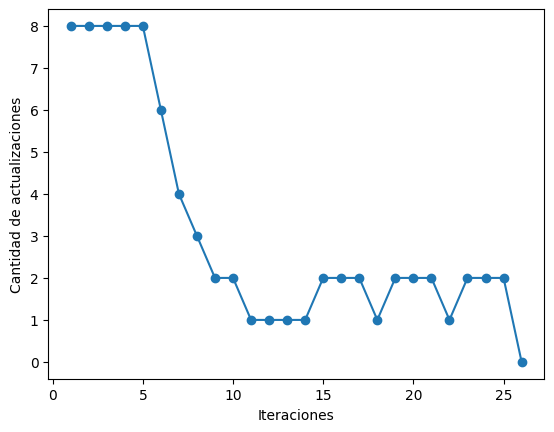

1 --> 45.45454545454545 %
2 --> 27.27272727272727 %
3 --> 36.36363636363637 %
4 --> 72.72727272727273 %
5 --> 63.63636363636363 %


In [161]:
globos = pd.read_csv(DATOS_DIR+'Globos.csv')

globosNorm = globos.copy()

# globosNorm['Color'] = globos['Color'].replace('Amarillo',0).replace('Rojo',1)
# globosNorm['Se_estira?'] = globos['Se_estira?'].replace('Si',1).replace('No',0)
# globosNorm['Inflado?'] = globos['Inflado?'].replace('Si',1).replace('No',0)
# globosNorm['Edad'] = globos['Edad'].replace('Adulto',1).replace('Niño',0)
# globosNorm['Tamanio'] = globos['Tamanio'].replace('Chico',0).replace('Mediano',0.5).replace('Grande',1)

#normalizo todos los valore salvo el que me interesa para dividir:
mapeo = { 'Color': {'Rojo':1, 'Amarillo':0},
          'Se_estira?': {'Si':1, 'No':0},
          'Edad': {'Adulto':1, 'Niño':0},
          'Tamanio' :{'Chico': 0, 'Mediano': 0.5, 'Grande':1}
        }
globosNorm.replace(mapeo, inplace=True)



###########################################
#CODIGO DEL ENTRENAMIENTO: 

X = np.array(globosNorm.iloc[:,:-1])
T= np.array((globosNorm['Inflado?'] == 'Si')*1)

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(
        X, T, test_size=0.30, random_state=42)


normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

#SETEO EL PERCEPTRON
ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn.fit(X_train, T_train) #ENTRENO EL PERCEPTRON

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

#defino una funcion para calcular que tal se predicen los valores de que si se va a explotar
def calcularPorcentajeAcierto(arr,b,nombre):
    ppn.w_ = np.array(arr)
    ppn.b_ = b

    Y_predict = ppn.predict(X_train)

    porcentajeAcierto = Y_predict.mean() * 100
    print(nombre,'-->',porcentajeAcierto,'%')


#cargo los valores de la tabla, para ver que tal predicen los valores:
calcularPorcentajeAcierto([0.05, 0.006,-0.068,-0.047 ]   ,0.005  ,'1')
calcularPorcentajeAcierto([-0.494, -0.003,0.722,0.489 ]  ,-0.4943,'2')
calcularPorcentajeAcierto([0.06, 0.004,0.1278,0.021 ]    ,-0.1132,'3')
calcularPorcentajeAcierto([ 0.296,0.026 , -0.576, -0.287],0.371  ,'4')
calcularPorcentajeAcierto([ 0.994, 0.006, -1.466,-0.989 ],0.988  ,'5')






